In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json

# Exploratory Data Analysis

After pulling data from the Yelp data set challenge, converting it to CSV files (other than the user file), and filtering out unneeded variables and removed all businesses that are not 'Restaurants' (by category). 

We will check the prevalence of tips, check-ins, and photos, but we suspect that only the reviews, users, and businesses data will be useful.

## Read in Data

In [2]:
checkins = pd.read_csv('Data/checkin_summary.csv', header=None)
photos = pd.read_csv('Data/photos_summary.csv', header=None)
reviews = pd.read_csv('Data/review_small.csv', header=None)
biz = pd.read_csv('Data/small_businesses.csv')
tips = pd.read_csv('Data/tip_summary.csv', header=None)
users = pd.read_json(path_or_buf='Data/user_small.json', lines=True)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,10,12,14,20,63,64,74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean Columns and Data

In [5]:
checkins.shape, photos.shape, reviews.shape, biz.shape, tips.shape, users.shape

((49414, 2), (26384, 2), (2927859, 4), (38668, 93), (558979, 3), (1183362, 7))

In [3]:
## Users: count years with elite status and convert join_date to DateTime
users['elite_count'] = users.iloc[:,1].apply(lambda x: len(x))
users['join_date'] = pd.to_datetime(users['yelping_since'])
users.head()

,average_stars,elite,review_count,user_id,yelping_since,elite_count,join_date
0,3.80,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",272,lsSiIjAKVl-QRxKjRErBeg,2010-07-13,8,2010-07-13
1,3.94,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",2559,om5ZiponkpRqUNa3pVPiRg,2006-01-18,12,2006-01-18
2,4.72,[],277,-lGwMGHMC_XihFJNKCJNRg,2014-10-31,0,2014-10-31
3,3.76,"[2016, 2017]",436,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01,2,2013-04-01
4,4.23,"[2017, 2016]",921,PcvbBOCOcs6_suRDH7TSTg,2012-08-16,2,2012-08-16


In [4]:
users.dtypes

average_stars           float64
elite                    object
review_count              int64
user_id                  object
yelping_since            object
elite_count               int64
join_date        datetime64[ns]
dtype: object

In [6]:
## Checkins: Add column headers
checkins.columns = ['business_id', 'num_checkins'] 
checkins.head()

,business_id,num_checkins
0,--6MefnULPED_I942VcFNA,122
1,--9e1ONYQuAa-CB_Rrw7Tw,2469
2,--DaPTJW3-tB1vP-PfdTEg,88
3,--FBCX-N37CMYDfs790Bnw,477
4,--GM_ORV2cYS-h38DSaCLw,13


In [7]:
## Photos: Add column headers
photos.columns = ['business_id', 'num_photos'] 
photos.head()

,business_id,num_photos
0,--6MefnULPED_I942VcFNA,1
1,--9e1ONYQuAa-CB_Rrw7Tw,127
2,--DaPTJW3-tB1vP-PfdTEg,1
3,--FBCX-N37CMYDfs790Bnw,4
4,--KCl2FvVQpvjzmZSPyviA,3


In [8]:
## Reviews: Add column headers and convert review_date to DateTime
reviews.columns = ['user_id', 'business_id', 'rating', 'date'] 
reviews['review_date'] = pd.to_datetime(reviews['date'])
reviews.head()

,user_id,business_id,rating,date,review_date
0,V2exkc2JwEdc8UNUNhT7sg,--6MefnULPED_I942VcFNA,5,2016-08-25,2016-08-25
1,j97y1ZAsYABIOcR0KQCy5Q,--6MefnULPED_I942VcFNA,1,2010-12-06,2010-12-06
2,8-KBKMJVO-j5YqpHb08j9w,--6MefnULPED_I942VcFNA,4,2015-08-05,2015-08-05
3,CxDOIDnH8gp9KXzpBHJYXw,--6MefnULPED_I942VcFNA,2,2010-12-22,2010-12-22
4,7Dykd1HolQx8mKPYhYDYSg,--6MefnULPED_I942VcFNA,2,2017-02-07,2017-02-07


In [9]:
## Business: Clean column names
biz.columns=biz.columns.str.replace('attributes.','')
biz.columns=biz.columns.str.replace('.',"_")
biz.head()

,Ambience_divey,HairSpecializesIn_kids,RestaurantsDelivery,Open24Hours,Ambience_trendy,DogsAllowed,CoatCheck,postal_code,Smoking,DietaryRestrictions_halal,...,RestaurantsReservations,DietaryRestrictions_dairy-free,BestNights_wednesday,DietaryRestrictions_vegan,Ambience_romantic,Music_jukebox,Ambience_upscale,RestaurantsTakeOut,BikeParking,OutdoorSeating
0,False,NaN,False,NaN,False,NaN,False,28105,NaN,NaN,...,False,NaN,NaN,NaN,False,False,False,True,True,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28164,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,True,NaN,False,NaN,False,NaN,NaN,15224,NaN,NaN,...,False,NaN,NaN,NaN,False,NaN,False,True,True,False
3,NaN,NaN,False,NaN,NaN,NaN,NaN,L5W 0E6,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True
4,False,NaN,False,NaN,False,NaN,NaN,53704,NaN,NaN,...,True,NaN,NaN,NaN,False,NaN,False,True,True,False


In [10]:
## Tips: Add column headers and fix business_id, user_id
tips.columns = ['business_id', 'user_id', 'unidentifiedinfo_tips'] 

tips['business_id'] = tips['business_id'].map(lambda x: x[1:])
tips['user_id'] = tips['user_id'].map(lambda x: x[:-1])
tips.head()

,business_id,user_id,unidentifiedinfo_tips
0,---1lKK3aKOuomHnwAkAow,0zoXYHq82haayMaV952jEQ,1
1,---1lKK3aKOuomHnwAkAow,A0X1baHPgw9IiBRivu0G9g,2
2,---1lKK3aKOuomHnwAkAow,Qy_tDaVTWlS14fEglzo1Tg,1
3,---1lKK3aKOuomHnwAkAow,RRw9I8pHt5PzgYGT2QeODw,1
4,---1lKK3aKOuomHnwAkAow,Xspg78dOvuedvuPEUwZBjw,1


## Check the relevance of tips, photos, and users

In [11]:
# How many unique users are there in the tips data set?
print(len(tips.user_id.unique()))
print(len(tips.user_id.unique())/len(users))

43082
0.03640644198478572


Since these represent less than 4 percent of all users, we can disregard them for analysis.

In [21]:
#Merge business and photos for only the businesses in each set
photo_biz = pd.merge(photos, biz, on='business_id', how='inner')
# How many unique businesses are there in the combined data set?
print(len(photo_biz.business_id.unique()))
print(len(photo_biz.business_id.unique())/len(biz))

21480
0.5554980862728871


Here we see a much greater share of businesses with photos, but we still have barely over half of businesses with photos (so it may not be a good predictor of popularity across the data set.

In [22]:
#Merge business and checkins for only the businesses in each set
checkin_biz = pd.merge(checkins, biz, on='business_id', how='inner')
# How many unique businesses are there in the check-ins data set?
print(len(checkin_biz.business_id.unique()))
print(len(checkin_biz.business_id.unique())/len(biz))

37533
0.9706475638771077


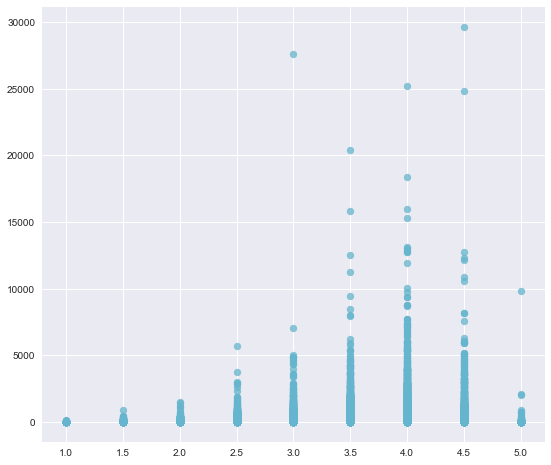

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))

#plt.hist(checkin_biz.num_checkins[checkin_biz.num_checkins < 1000], bins = 100, color=sns.color_palette()[5], alpha=0.75)
#plt.title('Distribution of Number of Check-ins per Restaurant')

plt.scatter(checkin_biz.stars, checkin_biz.num_checkins, color=sns.color_palette()[5], alpha=0.75)


We see that check-ins matches up somewhat well to the average business rating, but we will see if other factors better describe ratings.

## Now the good stuff: Exploring User and Review Data

In [32]:
# Merge with review data
users_viz = users[['user_id', 'average_stars', 'review_count', 'elite_count', 'join_date']]
reviews_viz = reviews[['user_id', 'business_id', 'rating', 'review_date']]

In [33]:
user_review_viz = pd.merge(users_viz, reviews_viz, on='user_id', how='outer')

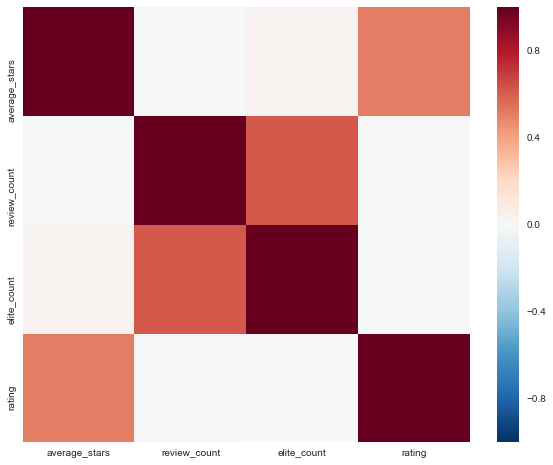

In [35]:
# Let's begin with a heat map of quantitative variables
fig, ax = plt.subplots(1,1, figsize =(10,8))
sns.heatmap(user_review_viz.corr(), ax=ax)

We see that average_stars and the given rating for a review correlate; meaning that there is some stickiness to a restaurant's overall review. We also see that review_count and elite_count correlate with one another, which makes sense, as Yelp likely selects elite users among those that review most often. However, neither are very important towards rating, so we'll leave those be for now.

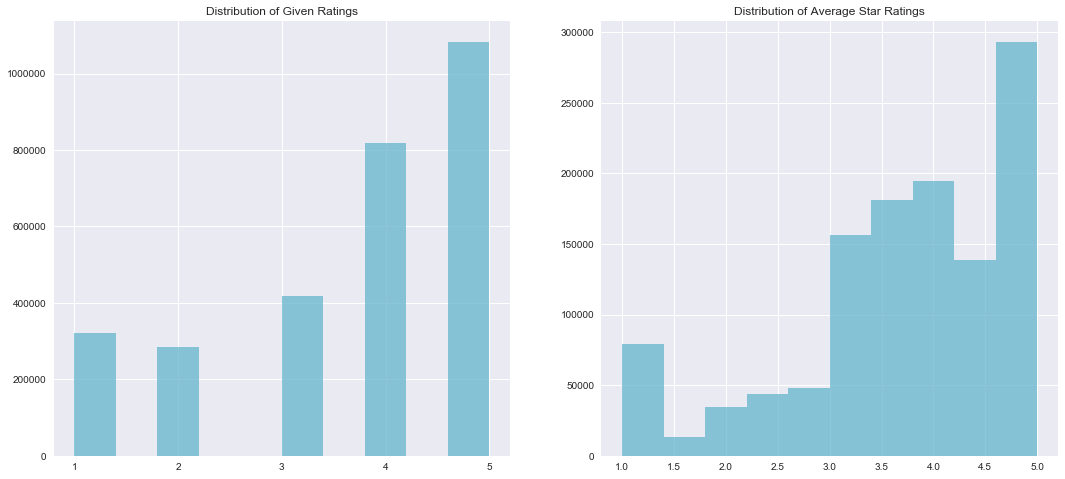

In [36]:
# How does the distribution of average rating compare to that of reviews
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.hist(reviews_viz.rating, color=sns.color_palette()[5], alpha=0.75, align='mid')
plt.xticks([1,2,3,4,5])
plt.title('Distribution of Given Ratings')

plt.subplot(1, 2, 2)
plt.hist(users_viz.average_stars, color=sns.color_palette()[5], alpha=0.75)
plt.title('Distribution of Average Star Ratings')

Here, we begin to see the distribution of ratings. They're skewed towards higher ratings (4s and 5s). But how much so?

In [38]:
users.describe()

,average_stars,review_count,elite_count
count,1.183362e+06,1.183362e+06,1.183362e+06
mean,3.711835e+00,2.372686e+01,1.525848e-01
std,1.105231e+00,8.050645e+01,8.163861e-01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.130000e+00,2.000000e+00,0.000000e+00
50%,3.890000e+00,5.000000e+00,0.000000e+00
75%,4.570000e+00,1.600000e+01,0.000000e+00
max,5.000000e+00,1.165600e+04,1.300000e+01


In [39]:
reviews.describe()

,rating
count,2.927859e+06
mean,3.702164e+00
std,1.343472e+00
min,1.000000e+00
25%,3.000000e+00
50%,4.000000e+00
75%,5.000000e+00
max,5.000000e+00


It's notable that the mean of rating and the median is 4, indicating that the distribution of reviews is skewed towards higher star ratings. 